<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Партос\AppData\Local\Temp\ipykernel_14156\2368352795.py:13: SyntaxWarning: invalid escape sequence '\A'
  data = pd.read_csv('D:\Andrushak\data\heart_disease_uci.csv')


Accuracy: 57.97%


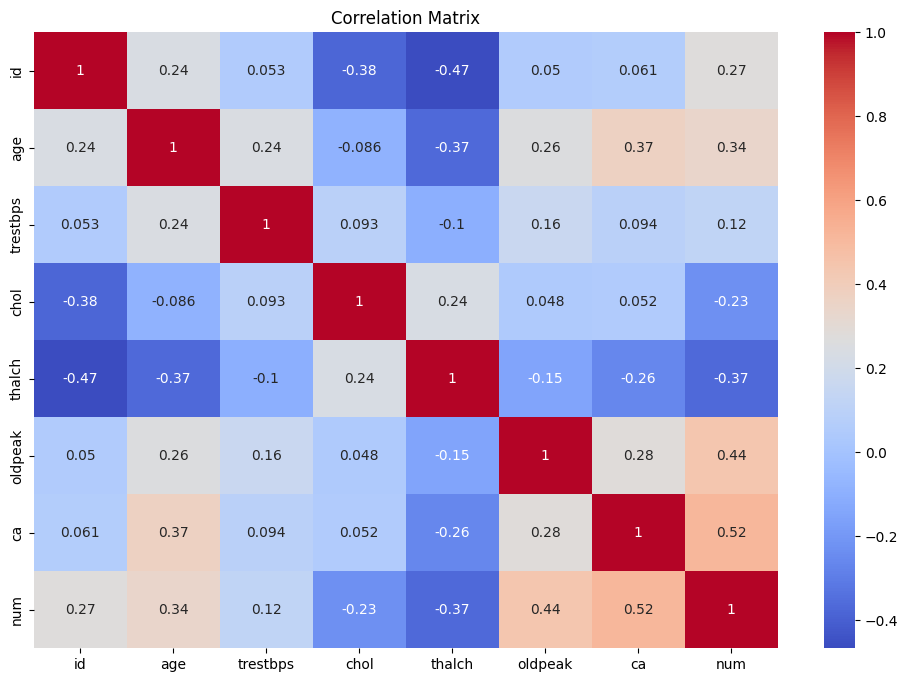

Selected features based on correlation: ['ca', 'oldpeak', 'thalch', 'age', 'id']
Accuracy with selected features: 53.99%


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження датасету
data = pd.read_csv('D:\Andrushak\data\heart_disease_uci.csv')

# Припустимо, що останній стовпчик містить мітки класів
X = data.iloc[:, :-1]  # Ознаки
y = data.iloc[:, -1]   # Мітки класів

# Знаходження категоріальних ознак
categorical_features = X.select_dtypes(include=['object']).columns

# Побудова пайплайну для перетворення даних
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), X.select_dtypes(exclude=['object']).columns)
    ])

# Поділ на тренувальну і валідаційну вибірки (70/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення і тренування моделі SVM
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(kernel='linear', decision_function_shape='ovr'))
])

model.fit(X_train, y_train)

# Прогнозування на валідаційній вибірці
y_pred = model.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Побудова кореляційної матриці
correlation_matrix = data.corr(numeric_only=True)  # Додаємо numeric_only=True
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Вибір 5 найбільш корельованих ознак з мітками класів
correlation_target = correlation_matrix[y.name].drop(y.name).abs()
selected_features = correlation_target.sort_values(ascending=False).head(5).index.tolist()

print(f'Selected features based on correlation: {selected_features}')

X_selected = data[selected_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.3, random_state=42)

# Побудова пайплайну для перетворення даних
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), selected_features)
    ])

# Створення і тренування моделі SVM з вибраними ознаками
model_selected = Pipeline(steps=[
    ('preprocessor', preprocessor_selected),
    ('classifier', svm.SVC(kernel='linear', decision_function_shape='ovr'))
])

model_selected.fit(X_train_selected, y_train_selected)

# Прогнозування на валідаційній вибірці з вибраними ознаками
y_pred_selected = model_selected.predict(X_test_selected)

# Оцінка точності з вибраними ознаками
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected * 100:.2f}%')
